In [6]:
import numpy as np

class Graph:
    def __init__(self):
        self.adj_matrix = np.zeros((0, 0), dtype=int)

    def vertex_count(self):
        return len(self.adj_matrix)

    def edge_count(self):
        return np.sum(self.adj_matrix) // 2  # Assuming an undirected graph

    def vertices(self):
        return list(range(len(self.adj_matrix)))

    def edges(self):
        edges = []
        for i in range(len(self.adj_matrix)):
            for j in range(i, len(self.adj_matrix)):
                if self.adj_matrix[i][j] == 1:
                    edges.append((i, j))
        return edges

    def get_edge(self, vertex1, vertex2):
        return self.adj_matrix[vertex1][vertex2] == 1

    def degree(self, vertex):
        return np.sum(self.adj_matrix[vertex])

    def incident_edges(self, vertex):
        edges = []
        for i in range(len(self.adj_matrix)):
            if self.adj_matrix[vertex][i] == 1:
                edges.append((vertex, i))
        return edges

    def insert_vertex(self):
        new_row = np.zeros((1, len(self.adj_matrix)), dtype=int)
        self.adj_matrix = np.vstack([self.adj_matrix, new_row])

        new_column = np.zeros((len(self.adj_matrix), 1), dtype=int)
        self.adj_matrix = np.hstack([self.adj_matrix, new_column])

    def remove_vertex(self, vertex):
        self.adj_matrix = np.delete(self.adj_matrix, vertex, axis=0)
        self.adj_matrix = np.delete(self.adj_matrix, vertex, axis=1)

    def insert_edge(self, vertex1, vertex2):
        max_vertex = max(vertex1, vertex2)
        while len(self.adj_matrix) <= max_vertex:
            self.insert_vertex()

        self.adj_matrix[vertex1][vertex2] = 1
        self.adj_matrix[vertex2][vertex1] = 1

    def remove_edge(self, vertex1, vertex2):
        self.adj_matrix[vertex1][vertex2] = 0
        self.adj_matrix[vertex2][vertex1] = 0


Number of vertices: 34
Number of edges: 78


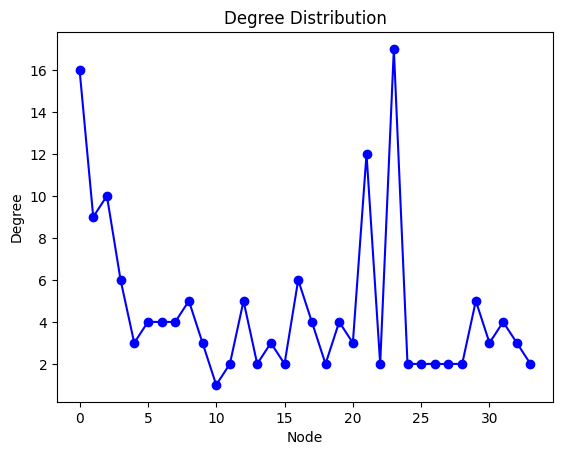

In [7]:
import matplotlib.pyplot as plt

def read_edgelist(file_path):
    with open(file_path, 'r') as file:
        edges = [tuple(map(int, line.strip().split())) for line in file]
    return edges

# Creare un'istanza del grafo
graph = Graph()

# Leggere il file edgelist e aggiungere vertici e archi al grafo
edges = read_edgelist('karate.edgelist.txt')
for edge in edges:
    graph.insert_edge(edge[0], edge[1])

# Stampare il numero di vertici e archi
print("Number of vertices:", graph.vertex_count())
print("Number of edges:", graph.edge_count())

# Plot del grado di ogni nodo
degrees = [graph.degree(vertex) for vertex in graph.vertices()]
plt.plot(graph.vertices(), degrees, 'bo-')
plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('Degree Distribution')
plt.show()
